# Session 2 - Homework ANGGORO Fajar Tri

## Exercise 6 Chapter 4
Suppose we collect data for a group of students in a statistics class with variables X1 = hours studied, X2 = undergrad GPA, and Y = receive an A. We fit a logistic regression and produce estimated coefficient, βˆ0 = −6, βˆ1 = 0.05, βˆ2 = 1.

In [2]:
# a)  Estimate the probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class.

# Define values
x1 = 40
x2 = 3.5
lr = -6 +(0.05*x1) + (1*x2)

# Calculate probability
prob = exp(lr) / (1 + exp(lr))
prob

[1] 0.3775407

In [3]:
# b) How many hours would the student in part (a) need to study to have a 50 % chance of getting an A in the class?
# putting the formula into Excel solver will yield x1 = 50 hours

## Exercise 8 Chapter 4

Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20 % on the training data and 30 % on the test data. Next we use 1-nearest neighbors (i.e. K = 1) and get an average error rate (averaged over both test and training data sets) of 18 %. Based on these results, which method should we prefer to use for classification of new observations? Why?

In [4]:
# We should use the Logistic regression, as KNN with k = 1 will overfit the data or has a training set error of 0, therefore,
# and average error rate of 18% could be interpreted as 36% error rate on the test set (higher than the logreg)

## Exercise 9 Chapter 4

This problem has to do with odds.

In [5]:
# a) On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default?

# could be written as: 0.37 = p(X) / (1 - p(X))
# therefore, p(X) = 0.27 or 27%

In [6]:
# b) Suppose that an individual has a 16 % chance of defaulting on her credit card payment. What are the odds that she will default?

# could be written as 0.16 / (1 - 0.16)
# therefore, the odds = 0.19 or 19% chance to default

## Exercise 10 Chapter 4

This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [7]:
library(ISLR)

#a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?
# numerical summary
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

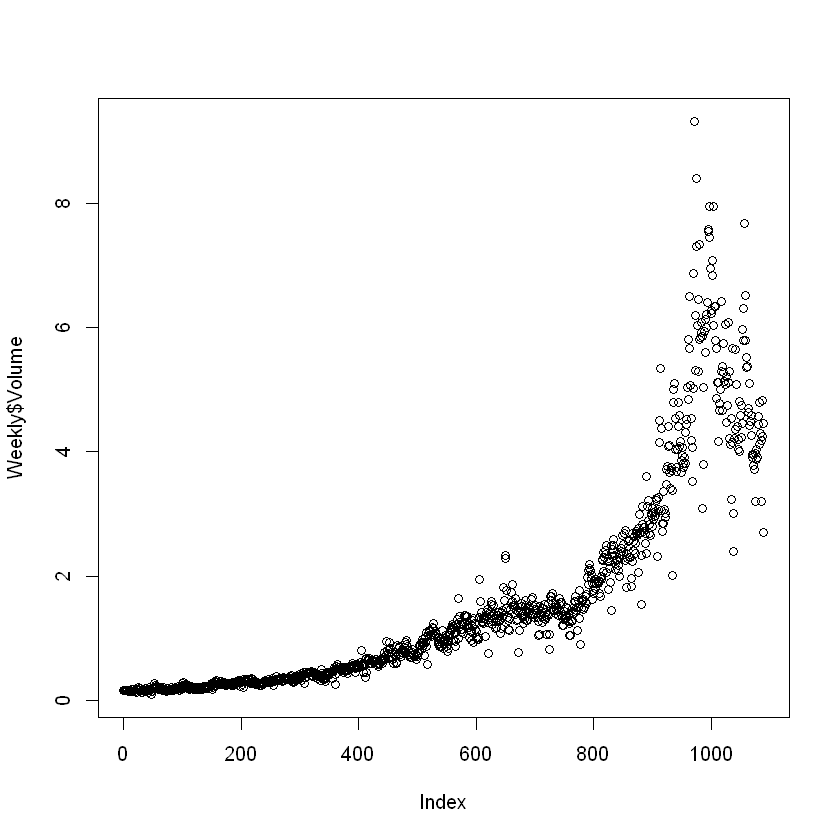

In [11]:
# graphical summaries
# The volume is increasing overtime
plot(Weekly$Volume)

In [13]:
# b)  Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume
# as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so,
# which ones?

logreg <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Weekly, binomial)
summary(logreg) # only lag2 is statistically signifant


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


In [16]:
# c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you
# about the types of mistakes made by logistic regression.

res <- predict(logreg, type = "response")
pred <- rep("Down", length(res))
pred[res > 0.5] <- "Up"
table(pred, Direction)
# We have an accuracy of 56%
# our model is performing better on predicting the "up" direction, but poorly on the "Down" direction

      Direction
pred   Down  Up
  Down   54  48
  Up    430 557

In [21]:
# d)  Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the
# confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).
attach(Weekly)

train <- (Year < 2009)
test <- Weekly[!train, ]
y_test <- Direction[!train]
logreg2 <- glm(Direction ~ Lag2, data = Weekly, family = binomial, subset = train)
summary(logreg2)

The following objects are masked from Weekly (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year


The following objects are masked from Weekly (pos = 4):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year





Call:
glm(formula = Direction ~ Lag2, family = binomial, data = Weekly, 
    subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


In [22]:
# prediction and confusion matrix
res <- predict(logreg2, test, type = "response")
pred <- rep("Down", length(res))
pred[res > 0.5] <- "Up"
table(pred, y_test)

      y_test
pred   Down Up
  Down    9  5
  Up     34 56

In [24]:
# e) Repeat (d) using LDA.
library(MASS)

lda <- lda(Direction ~ Lag2, data = Weekly, subset = train)
lda

Call:
lda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

In [25]:
res <- predict(lda, test)
table(res$class, y_test)

      y_test
       Down Up
  Down    9  5
  Up     34 56

In [26]:
# f) Repeat (d) using QDA.
library(MASS)

qda <- qda(Direction ~ Lag2, data = Weekly, subset = train)
qda

Call:
qda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

In [27]:
res <- predict(qda, test)
table(res$class, y_test)

      y_test
       Down Up
  Down    0  0
  Up     43 61

In [28]:
# g) Repeat (d) using KNN K=1.
library(class)

x_train <- as.matrix(Lag2[train])
x_test <- as.matrix(Lag2[!train])
y_train <- Direction[train]


knn <- knn(x_train, x_test, y_train, k = 1)
table(knn, y_test)

      y_test
knn    Down Up
  Down   21 29
  Up     22 32

In [29]:
# h)  Which of these methods appears to provide the best results on this data?

# Evaluating the error rates & accuracy, logistic regression & LDA has the lowest error rates

In [30]:
# i) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the
# methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held
# out data. Note that you should also experiment with values for K in the KNN classifier.

# lets try building the KNN with 5 neighbours
knn5 <- knn(x_train, x_test, y_train, k = 5)
table(knn5, y_test) # Model improves a bit, but logreg is still the better option

      y_test
knn5   Down Up
  Down   16 21
  Up     27 40

## Exercise 11 Chapter 4

In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

In [46]:
# a)  Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains 
# a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the 
# data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

attach(Auto)
mpg01 <- rep(0, length(mpg))
mpg01[mpg > median(mpg)] <- 1
Auto <- data.frame(Auto, mpg01)

The following object is masked _by_ .GlobalEnv:

    mpg01


The following objects are masked from Auto (pos = 3):

    acceleration, Auto.mpg01, cylinders, displacement, horsepower, mpg,
    mpg01, name, origin, weight, year




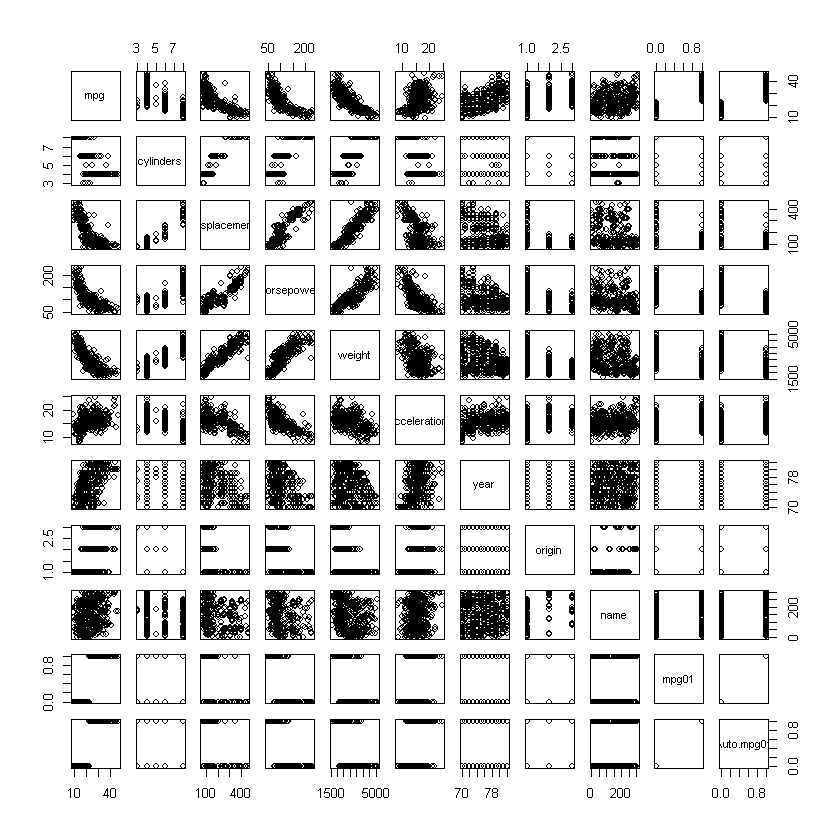

In [37]:
# b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the 
# other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to 
# answer this question. Describe your findings.

pairs(Auto) # there is a pattern between mpg01 and horsepower, weight, displacement

In [47]:
# c)  Split the data into a training set and a test set


train <- (year %% 2 == 0)
df_train <- Auto[train, ]
df_test <- Auto[!train, ]
y_test <- mpg01[!train]

In [50]:
# d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in
# (b). What is the test error of the model obtained?

lda <- lda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, subset = train)
res <- predict(lda, df_test)
table(res$class, y_test)
mean(res$class != y_test)

   y_test
     0  1
  0 86  9
  1 14 73

[1] 0.1263736

In [51]:
# e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in
# (b). What is the test error of the model obtained?

qda <- qda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, subset = train)
res <- predict(qda, df_test)
table(res$class, y_test)
mean(res$class != y_test)

   y_test
     0  1
  0 89 13
  1 11 69

[1] 0.1318681

In [52]:
# f)  Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most 
# associated with mpg01 in (b). What is the test error of the model obtained?

logreg <- glm(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, family = binomial, subset = train)
proba <- predict(logreg, df_test, type = "response")
res <- rep(0, length(proba))
res[proba > 0.5] <- 1
table(res, y_test)
mean(res != y_test)

   y_test
res  0  1
  0 89 11
  1 11 71

[1] 0.1208791

In [56]:
# g)  Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that 
# seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on 
# this data set?

x_train <- cbind(cylinders, weight, displacement, horsepower)[train, ]
x_test <- cbind(cylinders, weight, displacement, horsepower)[!train, ]
y_train <- mpg01[train]

# try with 5 neighbours
knn <- knn(x_train, x_test, y_train, k = 5)
table(knn, y_test)
mean(knn != y_test)

   y_test
knn  0  1
  0 82  9
  1 18 73

[1] 0.1483516

In [57]:
# try with 10 neighbours
knn <- knn(x_train, x_test, y_train, k = 10)
table(knn, y_test)
mean(knn != y_test)

# 5 is the best number of neighbours

   y_test
knn  0  1
  0 78  7
  1 22 75

[1] 0.1593407

### Source
https://rpubs.com/ppaquay/65560